## Model Comparison

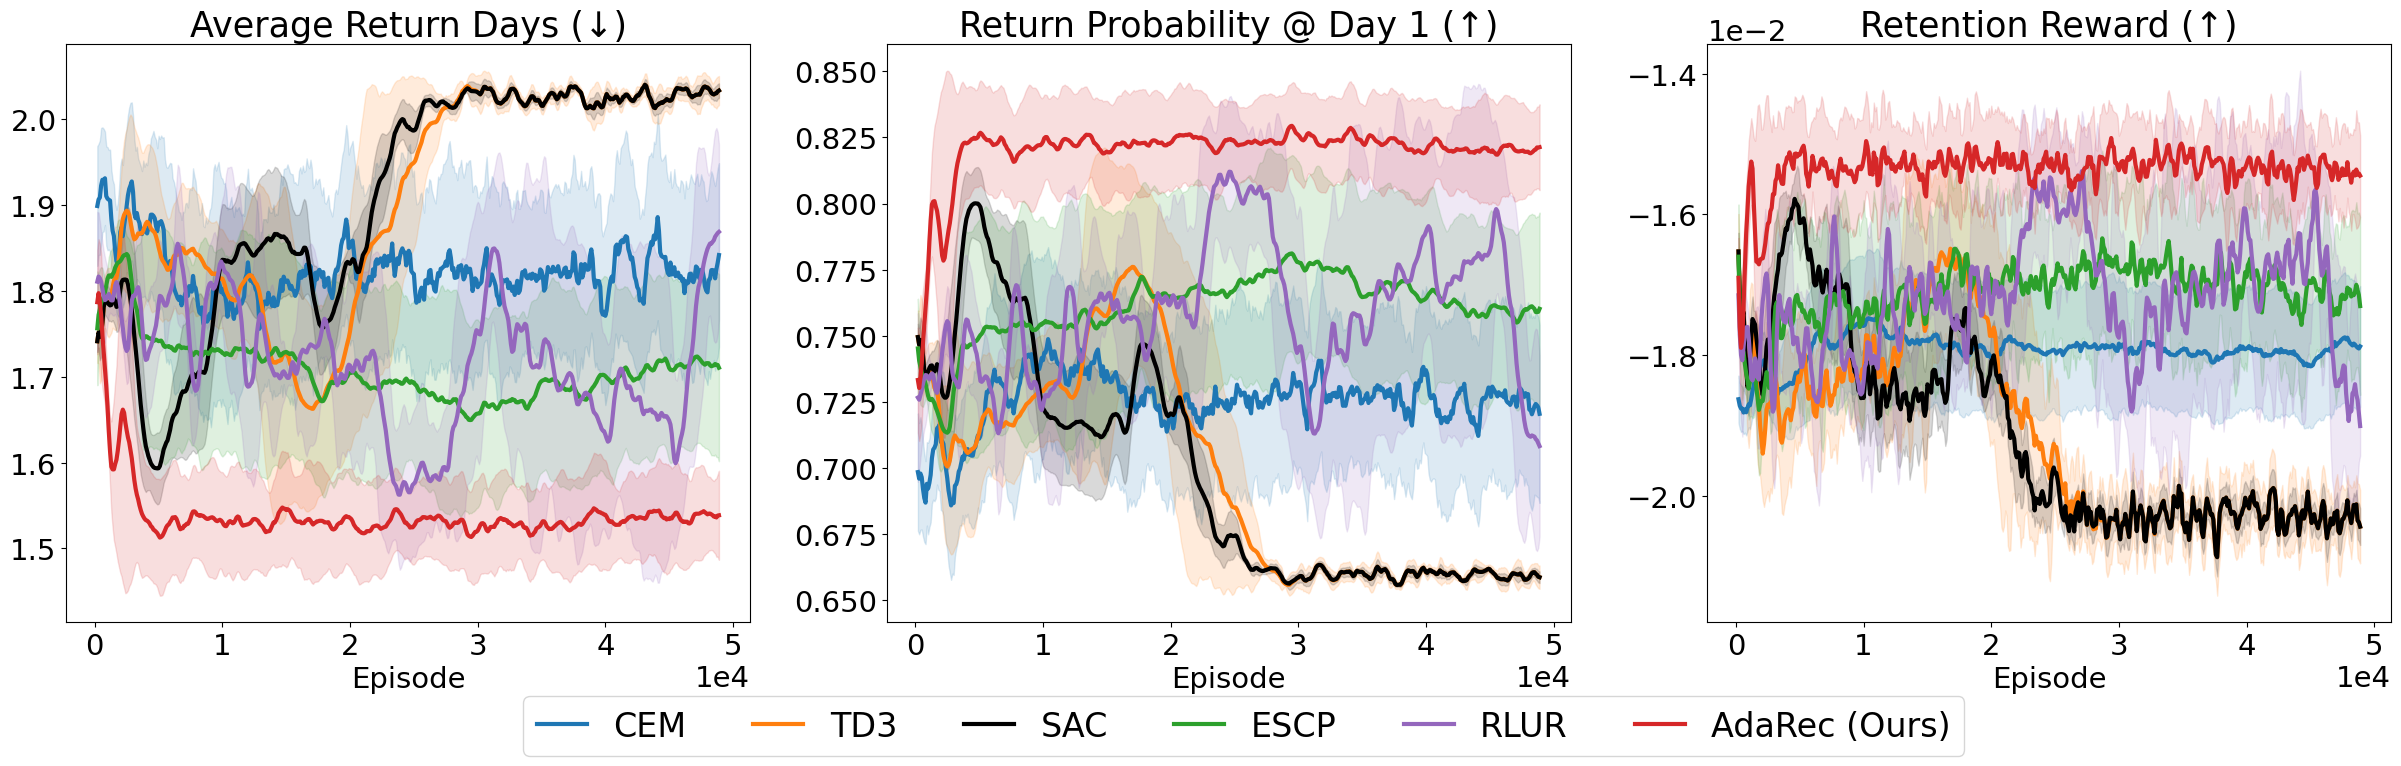

In [7]:
from plot_utils import get_rl_training_info, multiplot_multiple_line, smooth, get_multi_seed_info, multiplot_multiple_seed_line, multiplot_multiple_seed_line_custom
import numpy as np
import os
import matplotlib.pyplot as plt


def get_latest_time(log_path):
    paths = [i for i in os.listdir(log_path) if os.path.isdir(os.path.join(log_path, i))]
    paths.sort()
    return paths[-1]

plt.rcParams.update({'font.size': 21})

fig, axes = plt.subplots(1, 3, figsize = (30, 7.5))

# ['b', 'g', 'r', 'c', 'm', 'y', 'k']
info_list = []
color_list = [
    "C0",
    "C1",
    "black",
    "C2",
    "C4",
    "C3",
]
legend_list = [
    "CEM",
    "TD3", 
    "SAC",
    "ESCP",
    "RLUR", 
    "AdaRec (Ours)",
    ]
log_paths_list = [
    ["../output/multimodel/agent_cem/cem_baseline_with_reward_GaussianActor_PROB1.2_0.8_niter50000_noise0.1_alpha0.1_epbs128_seed{}".format(i) for i in [10,11,12,13]],
    ["../output/multimodel/agent_td3/td3_baseline_PROB1.2_0.8_ActionTransformer_reg0.00001_ep0.0_noise0.03_seed{i}".format(i=i) for i in [10, 11,12,13]],
    # ["../output/multimodel/agent_td3/paur_zoopt_meanQ_newgather_PAURActionTransformer_ZOOPTTruemean10_PROB1.2_0.8_"\
        # "FREEENCFalse_AUX0.003Q_annealFalse_beta30_delta30_actor0.0001_critic0.001_agentPAUR_ep0.0_noise0.01_seed{i}".format(i=i) for i in [10, 11,12,13]],
    ["../output/multimodel/agent_td3/td3_baseline_PROB1.1_0.9_ActionTransformer_reg0.00001_ep0.0_noise0.03_seed{i}".format(i=i) for i in [10, 11,12,13]],
    ["../output/multimodel/agent_td3/paur_zmovavg_PAURActionTransformer_MOV_AVGTrue0.9_PROB1.2_0.8_FREEENCFalse_"\
        "AUX0.003Q_annealFalse_beta30_delta30_actor0.0001_critic0.001_agentPAUR_ep0.0_noise0.01_seed{}".format(i) for i in [10,11,12,13]],
    ["../output/multimodel/agent/rlur_PROB1.2_0.8_SEED{}".format(i) for i in [11, 12,13, 14]],
    ["../output/multimodel/agent_td3/paur_adapt_env_PAURActionTransformer_PROB1.2_0.8_AUX0.003Q_annealFalse_"\
        "RLURGAMMAFalse_beta30_delta30_actor0.0001_critic0.001_agentPAUR_reg0.00001_ep0.0_noise0.01_seed{}".format(i) for i in [10, 12, 13, 15]],
]
for log_paths in log_paths_list:
    if "cem" in log_paths[0]:
        smoothness = 10
    else:
        smoothness = 2
    log_files = []
    for log_path in log_paths:
        try:
            time = get_latest_time(log_path)
        except IndexError:
            time = ""
        log_file = os.path.join(log_path, time, "model.report")
        log_files.append(log_file)
    info = get_multi_seed_info(log_files,
                                # ['average_return_day'] + [f'retention_day{d}' for d in [1,2,3,4,5,6,7,8,9]],
                                ['average_return_day'] + [f'retention_day{d}' for d in [1]],
                                ['reward'],
                                )
    for k in ['mean_episode', 'std_episode']:
        v = info[k]
        for kk in list(v.keys()):
            vv = v[kk]
            v[kk] = smooth(np.array(vv), smoothness)
        # info[k] = smooth(np.array(v)[:200], smoothness)
#         info[k] = smooth(np.array(v), smoothness)
    info_list.append([info['episode'], info['mean_episode'], info['std_episode']])

multiplot_multiple_seed_line_custom(legend_list, info_list, axes, [0,1,2], 488,[0.5,1,0.5,1,1,1],
                                    x_name = 'Episode',bbox=(1.6,-0.10), color_list=color_list)
fig.savefig("exp_result_new_appendix.pdf", bbox_inches='tight', pad_inches=0.1)

average_return_day 497
retention_day1 497
reward 497
critic1_loss 497
average_return_day 497
retention_day1 497
reward 497
critic1_loss 497
average_return_day 497
retention_day1 497
reward 497
critic1_loss 497


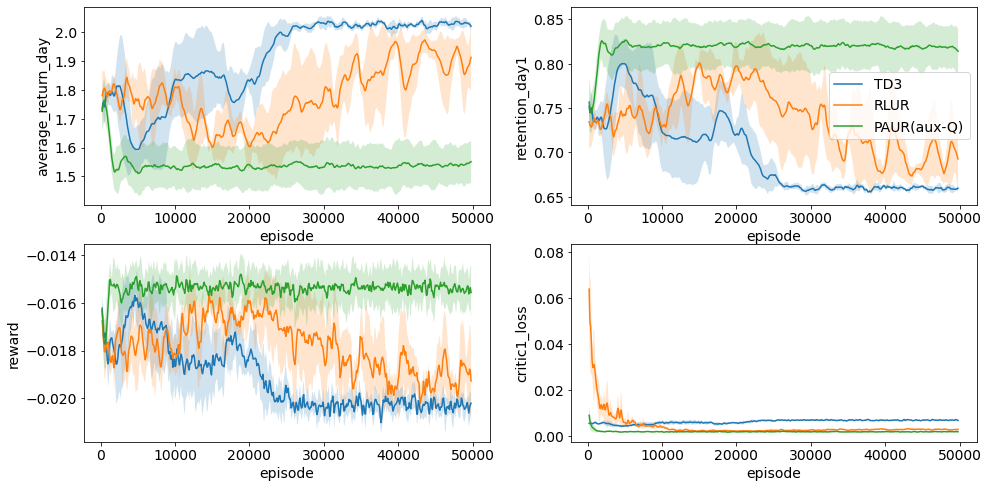

In [2]:
from plot_utils import get_rl_training_info, multiplot_multiple_line, smooth, get_multi_seed_info, multiplot_multiple_seed_line
import numpy as np
import os

def get_latest_time(log_path):
    paths = [i for i in os.listdir(log_path) if os.path.isdir(os.path.join(log_path, i))]
    paths.sort()
    return paths[-1]
smoothness = 1
info_list = []
legend_list = [
    "TD3", 
    "RLUR", 
    "PAUR(aux-Q)"
    ]
log_paths_list = [
    ["../output/multimodel/agent_td3/td3_baseline_PROB1.1_0.9_ActionTransformer_reg0.00001_ep0.0_noise0.03_seed{i}".format(i=i) for i in [10, 11,12,13]],
    ["../output/multimodel/agent/rlur_PROB1.1_0.9_SEED{}".format(i) for i in [10, 11, 13, 14]],
["..//output/multimodel/agent_td3/paur_adapt_env_PAURActionTransformer_PROB1.1_0.9_AUX0.003Q_annealFalse_RLURGAMMAFalse_beta30_delta30_actor0.0001_critic0.001_agentPAUR_reg0.00001_ep0.0_noise0.01_seed{}".format(i) for i in [10, 11, 12, 14]]
]
for log_paths in log_paths_list:
    log_files = []
    for log_path in log_paths:
        try:
            time = get_latest_time(log_path)
        except IndexError:
            time = ""
        log_file = os.path.join(log_path, time, "model.report")
        log_files.append(log_file)
    info = get_multi_seed_info(log_files,
                                # ['average_return_day'] + [f'retention_day{d}' for d in [1,2,3,4,5,6,7,8,9]],
                                ['average_return_day'] + [f'retention_day{d}' for d in [1,]],
                                ['reward', 'critic1_loss'])
    for k in ['mean_episode', 'std_episode']:
        v = info[k]
        for kk in list(v.keys()):
            vv = v[kk]
            v[kk] = smooth(np.array(vv), smoothness)
    #     # info[k] = smooth(np.array(v)[:200], smoothness)
    #     info[k] = smooth(np.array(v), smoothness)
    # print(info.keys())
    # print(info['all_loss'].keys())
    info_list.append([info['episode'], info['mean_episode'], info['std_episode']])
multiplot_multiple_seed_line(legend_list, info_list, x_name = 'episode')

average_return_day 497
retention_day1 497


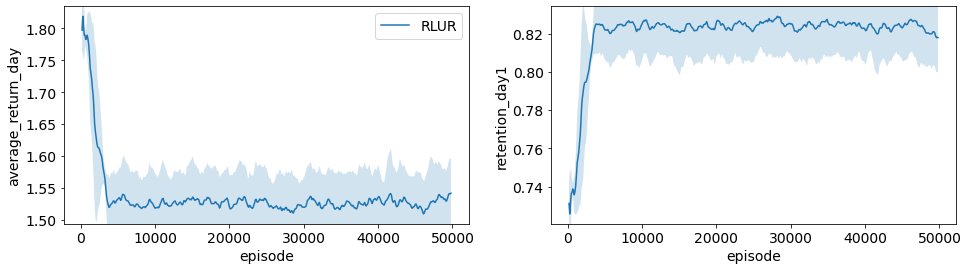

In [7]:
from plot_utils import get_rl_training_info, multiplot_multiple_line, smooth, get_multi_seed_info, multiplot_multiple_seed_line
import numpy as np
import os

def get_latest_time(log_path):
    paths = [i for i in os.listdir(log_path) if os.path.isdir(os.path.join(log_path, i))]
    paths.sort()
    return paths[-1]
smoothness = 1
info_list = []
# legend_list = ["PAUR", "TD3", "RLUR+OAC", "RLUR"]
seed_list = ["10", "11", "13", "14"]
legend_list = ["RLUR"]
log_paths = ["../output/kuairand_nips23/agent_td3/paur_PAURActionTransformer_annealTrue_beta30_delta30_actor0.0001_critic0.001_agentPAUR_reg0.00001_ep0.0_noise0.01_seed{i}".format(i=i) for i in seed_list]
log_files = []
for log_path in log_paths:
    try:
        time = get_latest_time(log_path)
    except IndexError:
        time = ""
    log_file = os.path.join(log_path, time, "model.report")
    log_files.append(log_file)
info = get_multi_seed_info(log_files,
                            # ['average_return_day'] + [f'retention_day{d}' for d in [1,2,3,4,5,6,7,8,9]],
                            ['average_return_day'] + [f'retention_day{d}' for d in [1,]],
                            )
for k in ['mean_episode', 'std_episode']:
    v = info[k]
    for kk in list(v.keys()):
        vv = v[kk]
        v[kk] = smooth(np.array(vv), smoothness)
#     # info[k] = smooth(np.array(v)[:200], smoothness)
#     info[k] = smooth(np.array(v), smoothness)
info_list.append(info['episode'])
info_list.append(info['mean_episode']) 
info_list.append(info['std_episode'])   
multiplot_multiple_seed_line(legend_list, info_list, x_name = 'episode')

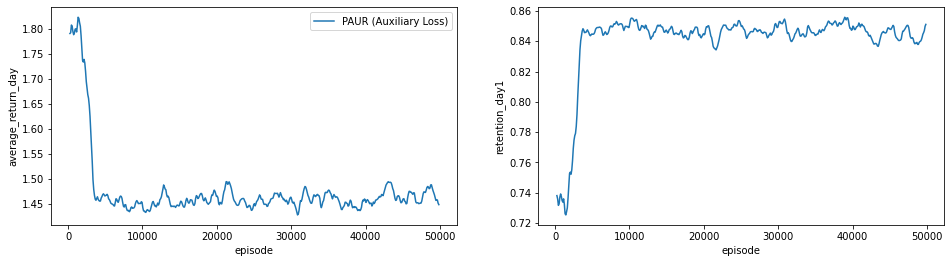

In [1]:
from plot_utils import get_rl_training_info, multiplot_multiple_line, smooth
import numpy as np
import os

def get_latest_time(log_path):
    paths = [i for i in os.listdir(log_path) if os.path.isdir(os.path.join(log_path, i))]
    paths.sort()
    return paths[-1]
smoothness = 1
info_list = []
# legend_list = ["PAUR", "TD3", "RLUR+OAC", "RLUR"]
# seed_list = ["11", "13", "17", "19"]
# seed_list = ["10", "12"]
legend_list = ["PAUR (Auxiliary Loss)"]
log_paths = [
    # f"../output/kuairand_nips23/agent/RLUR_baseline3_SEED{i}"\
        # for i in seed_list
    "../output/kuairand_nips23/agent_td3/test_aux_loss_PAURActionTransformer_AUX0.0003annealFalse_beta30_delta30_actor0.0001_critic0.001_agentPAUR_reg0.00001_ep0.0_noise0.01_seed19"
]
for log_path in log_paths:
    try:
        time = get_latest_time(log_path)
    except IndexError:
        time = ""
    log_file = os.path.join(log_path, time, "model.report")
    info = get_rl_training_info(log_file, 
                                # ['average_return_day'] + [f'retention_day{d}' for d in [1,2,3,4,5,6,7,8,9]],
                                ['average_return_day'] + [f'retention_day{d}' for d in [1,]],
                                )
    for k in list(info.keys()):
        v = info[k]
        # info[k] = smooth(np.array(v)[:200], smoothness)
        info[k] = smooth(np.array(v), smoothness)
    info_list.append(info)   
multiplot_multiple_line(legend_list, info_list, x_name = 'episode')

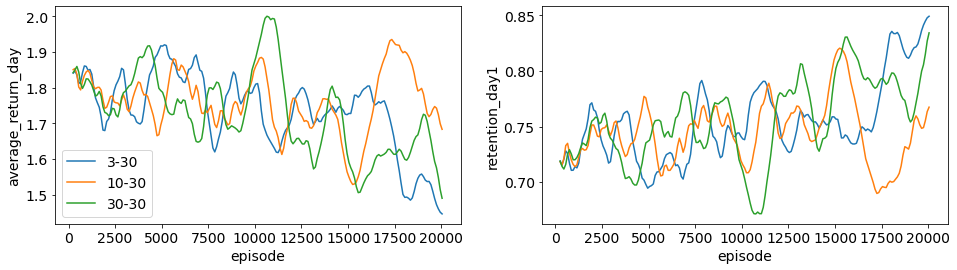

In [25]:
from plot_utils import get_rl_training_info, multiplot_multiple_line, smooth
import numpy as np
import os

def get_latest_time(log_path):
    paths = [i for i in os.listdir(log_path) if os.path.isdir(os.path.join(log_path, i))]
    paths.sort()
    return paths[-1]
smoothness = 1
info_list = []
# legend_list = ["TD3+OAC", "TD3", "RLUR+OAC", "RLUR"]
i_lst = [3,10,30]
# j_lst = [10, 30, 100]
j_lst = [30]

legend_list = [f"{i}-{j}" for i in i_lst for j in  j_lst]
log_paths = [
    f"../output/kuairand_nips23/agent/RLUR_OAC_LevelActionTransformer_PAURPro_beta{i}_delta{j}_actor0.0001_critic0.0001_imcritic0.0001_rnd0.001_rndweight1_reg0.00001_ep0.0_noise0.01_lambdaT1_lambdaI0.001_high1_seed19"\
        for i in i_lst for j in j_lst 
]
for log_path in log_paths:
    try:
        time = get_latest_time(log_path)
    except IndexError:
        time = ""
    log_file = os.path.join(log_path, time, "model.report")
    info = get_rl_training_info(log_file, 
                                # ['average_return_day'] + [f'retention_day{d}' for d in [1,2,3,4,5,6,7,8,9]],
                                ['average_return_day'] + [f'retention_day{d}' for d in [1,]],
                                )
    for k in list(info.keys()):
        v = info[k]
        info[k] = smooth(np.array(v)[:200], smoothness)
    info_list.append(info)   
multiplot_multiple_line(legend_list, info_list, x_name = 'episode')

In [6]:
from plot_utils import get_rl_training_info, multiplot_multiple_line, smooth, get_multi_seed_info, multiplot_multiple_seed_line
import numpy as np
import os

def get_latest_time(log_path):
    paths = [i for i in os.listdir(log_path) if os.path.isdir(os.path.join(log_path, i))]
    paths.sort()
    return paths[-1]
smoothness = 1
info_list = []
# legend_list = ["PAUR", "TD3", "RLUR+OAC", "RLUR"]
seed_list = ["19"]
legend_list = ["PAUR"]
log_paths = ["../output/kuairand_nips23/agent_td3/test_aux_loss_PAURActionTransformer_AUX0.003annealFalse_beta30_delta30_actor0.0001_critic0.001_agentPAUR_reg0.00001_ep0.0_noise0.01_seed{i}".format(i=i) for i in seed_list]
log_files = []
for log_path in log_paths:
    try:
        time = get_latest_time(log_path)
    except IndexError:
        time = ""
    log_file = os.path.join(log_path, time, "model.report")
    log_files.append(log_file)
info = get_multi_seed_info(log_files,
                            # ['average_return_day'] + [f'retention_day{d}' for d in [1,2,3,4,5,6,7,8,9]],
                            ['average_return_day'] + [f'retention_day{d}' for d in [1,]],
                            )
for k in ['mean_episode', 'std_episode']:
    v = info[k]
    for kk in list(v.keys()):
        vv = v[kk]
        v[kk] = smooth(np.array(vv), smoothness)
#     # info[k] = smooth(np.array(v)[:200], smoothness)
#     info[k] = smooth(np.array(v), smoothness)
info_list.append(info['episode'])
info_list.append(info['mean_episode']) 
info_list.append(info['std_episode'])   
multiplot_multiple_seed_line(legend_list, info_list, x_name = 'episode')

AttributeError: 'int' object has no attribute 'items'

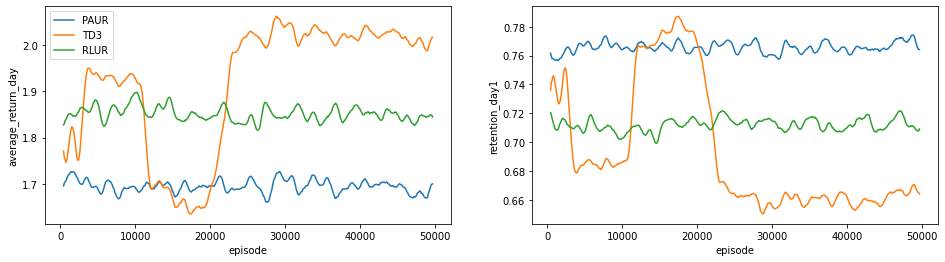

In [1]:
from plot_utils import get_rl_training_info, multiplot_multiple_line, smooth
import numpy as np
import os

def get_latest_time(log_path):
    paths = [i for i in os.listdir(log_path) if os.path.isdir(os.path.join(log_path, i))]
    paths.sort()
    return paths[-1]
smoothness = 5
info_list = []
legend_list = ["PAUR", "TD3", "RLUR"]
log_paths = [
    "../output/kuairand_nips23/agent_td3/td3_oac_ActionTransformer_beta10_delta100_reg0.00001_ep0.0_noise0.03_seed19/",
    "../output/kuairand_nips23/agent_td3/td3_baseline_ActionTransformer_reg0.00001_ep0.0_noise0.03_seed19/",
    "../output/kuairand_nips23/agent/RLUR_baseline1_LevelActionTransformer_REWsame_get_retention_rewardIMREW_True_beta3_delta10_actor0.0001_critic0.0001_imcritic0.0001_rnd0.001_rndweight1_reg0.00001_ep0.0_noise0.01_lambdaT1_lambdaI0.001_high1_seed19/"
]
for log_path in log_paths:
    try:
        time = get_latest_time(log_path)
    except IndexError:
        time = ""
    log_file = os.path.join(log_path, time, "model.report")
    info = get_rl_training_info(log_file, 
                                # ['average_return_day'] + [f'retention_day{d}' for d in [1,2,3,4,5,6,7,8,9]],
                                ['average_return_day'] + [f'retention_day{d}' for d in [1,]],
                                )
    for k in list(info.keys()):
        v = info[k]
        info[k] = smooth(np.array(v), smoothness)
    info_list.append(info)   
multiplot_multiple_line(legend_list, info_list, x_name = 'episode')